In [1]:
using LinearAlgebra, StatsBase, Serialization, Distributions, StableDistributions, LaTeXStrings, SharedArrays, SpecialFunctions, QuadGK
using CairoMakie, Colors, ColorSchemes
# using Plots
include("../AdL.jl"); include("../Ad2L.jl"); include("../force.jl");

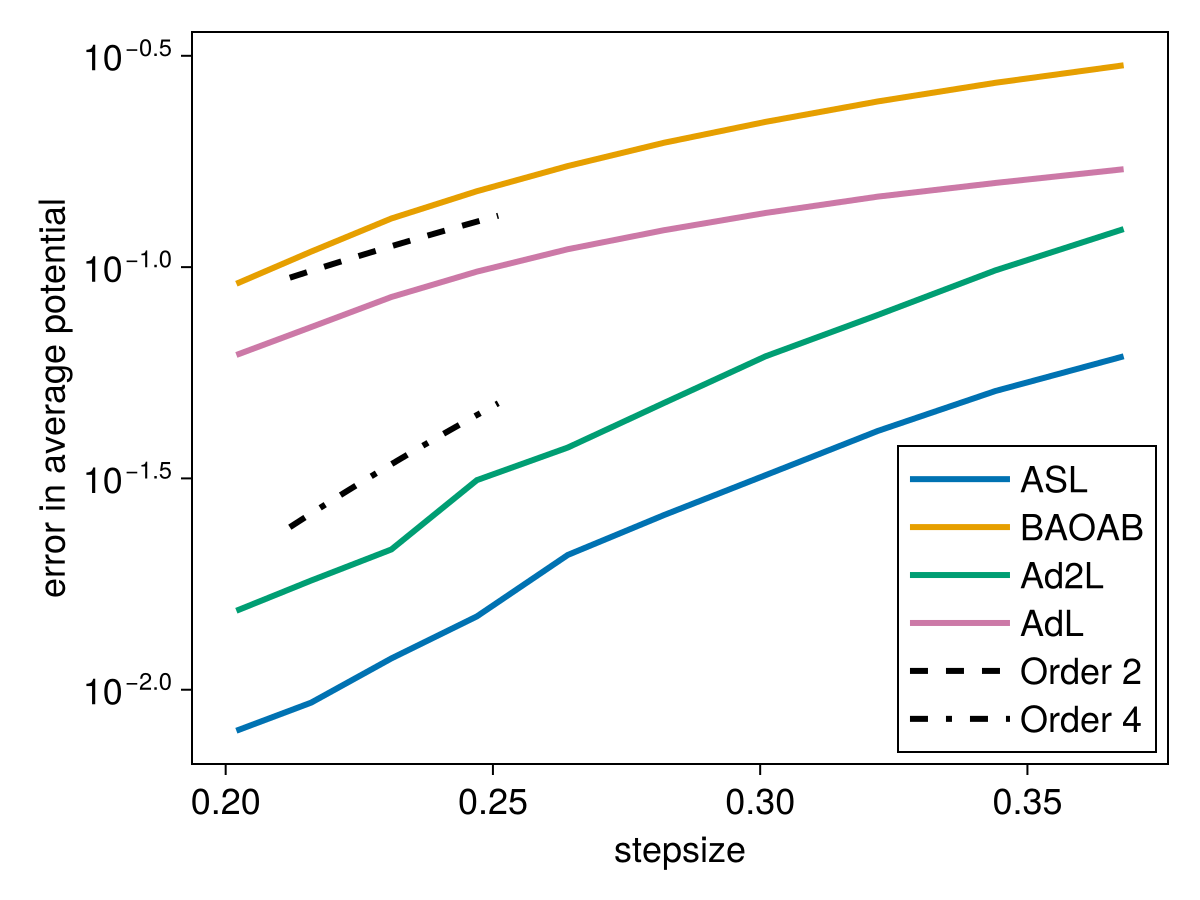

In [14]:
q_pot = pot_V; λ=1
h_lst = [0.202, 0.216, 0.231, 0.247, 0.264, 0.282, 0.301, 0.322, 0.344,0.368]
bias_ASL = open(deserialize, "data/bias_ASL_λ="*string(λ)*".jls"); bias_ASL = [mean(bias_ASL[i,:]) for i in 1:length(h_lst)]
g_avg_ASL = open(deserialize, "data/g_avg_ASL_λ="*string(λ)*".jls"); g_avg_ASL = [mean(g_avg_ASL[i,:]) for i in 1:length(h_lst)]
bias_BAOAB = open(deserialize, "data/bias_BAOAB_λ="*string(λ)*".jls"); bias_BAOAB = [mean(bias_BAOAB[i,:]) for i in 1:length(h_lst)]
bias_Ad2L = open(deserialize, "data/bias_Ad2L_λ="*string(λ)*".jls"); bias_Ad2L = [mean(bias_Ad2L[i,:]) for i in 1:length(h_lst)]
g_avg_Ad2L = open(deserialize, "data/g_avg_Ad2L_λ="*string(λ)*".jls"); g_avg_Ad2L = [mean(g_avg_Ad2L[i,:]) for i in 1:length(h_lst)]
bias_AdL = open(deserialize, "data/bias_AdL_λ="*string(λ)*".jls"); bias_AdL = [mean(bias_AdL[i,:]) for i in 1:length(h_lst)];

fig = Figure(size=(600, 450), fontsize=18, linewidth=3)
ax = Axis(fig[1, 1], xlabel="stepsize", ylabel="error in average potential", yscale=log10)
ax.xgridvisible = false; ax.ygridvisible = false

lines!(ax, h_lst, bias_ASL, label="ASL")
lines!(ax, h_lst, bias_BAOAB, label="BAOAB")
lines!(ax, h_lst, bias_Ad2L, label="Ad2L")
lines!(ax, h_lst, bias_AdL, label="AdL")

xx = 0.212:0.001:0.251
lines!(ax, xx, 2.1*xx.^2, color = :black, linestyle = :dash, label = "Order 2")
lines!(ax, xx, 12*xx.^4, color = :black, linestyle = :dashdot, label = "Order 4")
# xx = 0.202:0.001:0.247
# lines!(ax, xx, 1.4*xx.^3, color = :black, linestyle = :dot, label = "Order 3")

axislegend(ax, fontsize=28, position=:rb, patchsize = (50, 20))
# save("bias_steep_nonoise.pdf", fig)
# save("bias_steep_largenoise.pdf", fig)
fig

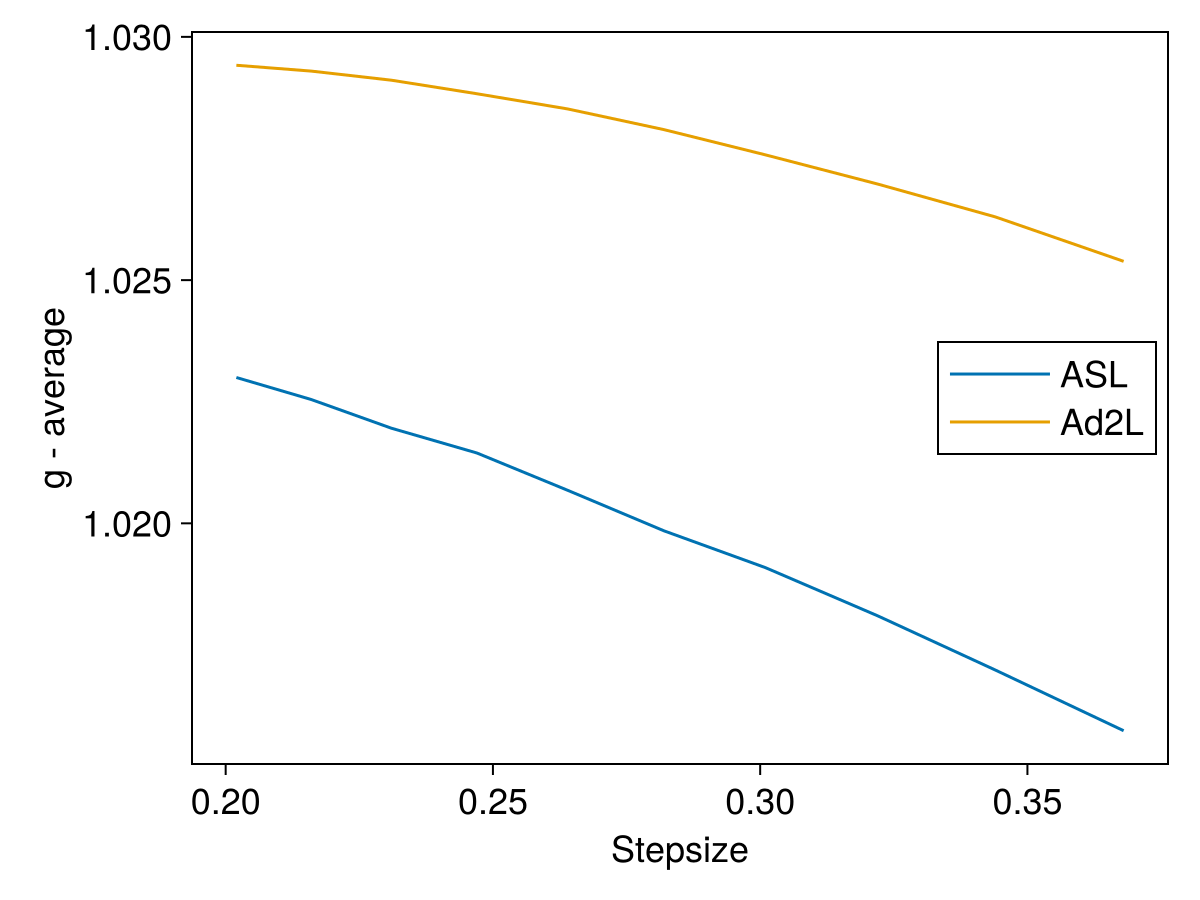

In [20]:
fig = Figure(size=(600, 450), fontsize=18)
ax = Axis(fig[1, 1], xlabel="Stepsize", ylabel="g - average")
ax.xgridvisible = false; ax.ygridvisible = false
lines!(ax, h_lst, g_avg_ASL, label="ASL")
lines!(ax, h_lst, g_avg_Ad2L, label="Ad2L")

axislegend(ax, position=:rc, patchsize = (50, 20))
# save("g_avg_steep_nonoise.pdf", fig)
# save("g_avg_steep_smallnoise.pdf", fig)
# save("g_avg_steep_largenoise.pdf", fig)
fig

In [21]:
mean(g_avg_ASL)

1.0199380310347315

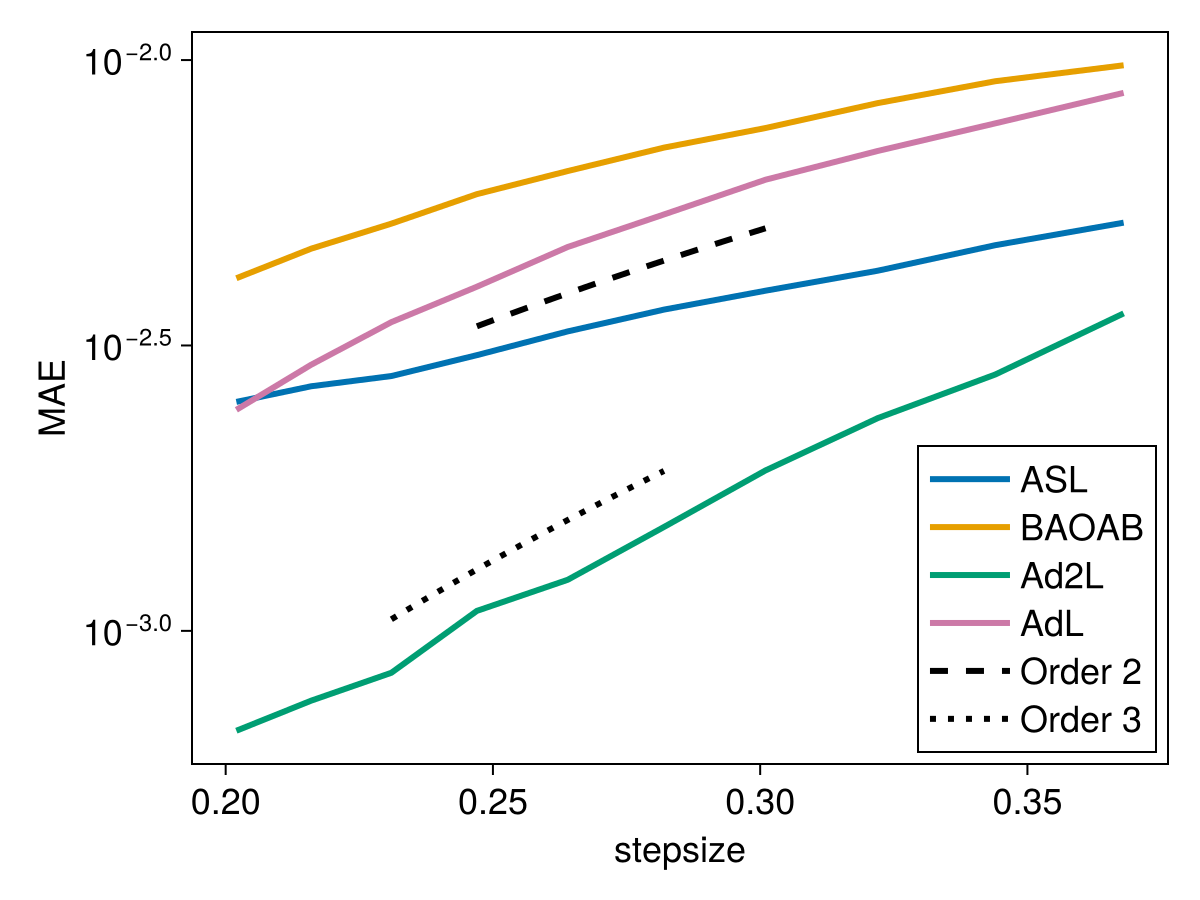

In [32]:
q_pot = pot_V; λ=50
h_lst = [0.202, 0.216, 0.231, 0.247, 0.264, 0.282, 0.301, 0.322, 0.344,0.368]
bias_ASL_MAE = open(deserialize, "data/bias_ASL_MAE_λ="*string(λ)*".jls"); bias_ASL_MAE = [mean(bias_ASL_MAE[i,:]) for i in 1:length(h_lst)]
g_avg_ASL_MAE = open(deserialize, "data/g_avg_ASL_MAE_λ="*string(λ)*".jls"); g_avg_ASL_MAE = [mean(g_avg_ASL_MAE[i,:]) for i in 1:length(h_lst)]
bias_BAOAB_MAE = open(deserialize, "data/bias_BAOAB_MAE_λ="*string(λ)*".jls"); bias_BAOAB_MAE = [mean(bias_BAOAB_MAE[i,:]) for i in 1:length(h_lst)]
bias_Ad2L_MAE = open(deserialize, "data/bias_Ad2L_MAE_λ="*string(λ)*".jls"); bias_Ad2L_MAE = [mean(bias_Ad2L_MAE[i,:]) for i in 1:length(h_lst)]
g_avg_Ad2L_MAE = open(deserialize, "data/g_avg_Ad2L_MAE_λ="*string(λ)*".jls"); g_avg_Ad2L_MAE = [mean(g_avg_Ad2L_MAE[i,:]) for i in 1:length(h_lst)]
bias_AdL_MAE = open(deserialize, "data/bias_AdL_MAE_λ="*string(λ)*".jls"); bias_AdL_MAE = [mean(bias_AdL_MAE[i,:]) for i in 1:length(h_lst)];

fig = Figure(size=(600, 450), fontsize=18, linewidth=3)
ax = Axis(fig[1, 1], xlabel="stepsize", ylabel="MAE", yscale=log10)
ax.xgridvisible = false; ax.ygridvisible = false
lines!(ax, h_lst, bias_ASL_MAE, label="ASL")
lines!(ax, h_lst, bias_BAOAB_MAE, label="BAOAB")
lines!(ax, h_lst, bias_Ad2L_MAE, label="Ad2L")
lines!(ax, h_lst, bias_AdL_MAE, label="AdL")

xx = 0.247:0.001:0.301
lines!(ax, xx, 0.056*xx.^2, color = :black, linestyle = :dash, label = "Order 2")
xx = 0.231:0.001:0.282
# lines!(ax, xx, 0.07*xx.^2, color = :black, linestyle = :dash, label = "Order 2")
lines!(ax, xx, 0.085*xx.^3, color = :black, linestyle = :dot, label = "Order 3")

axislegend(ax, fontsize=28, position=:rb, patchsize = (40, 20))
# save("bias_steep_MAE_nonoise.pdf", fig)
# save("bias_steep_MAE_largenoise_λ=$λ.pdf", fig)
fig

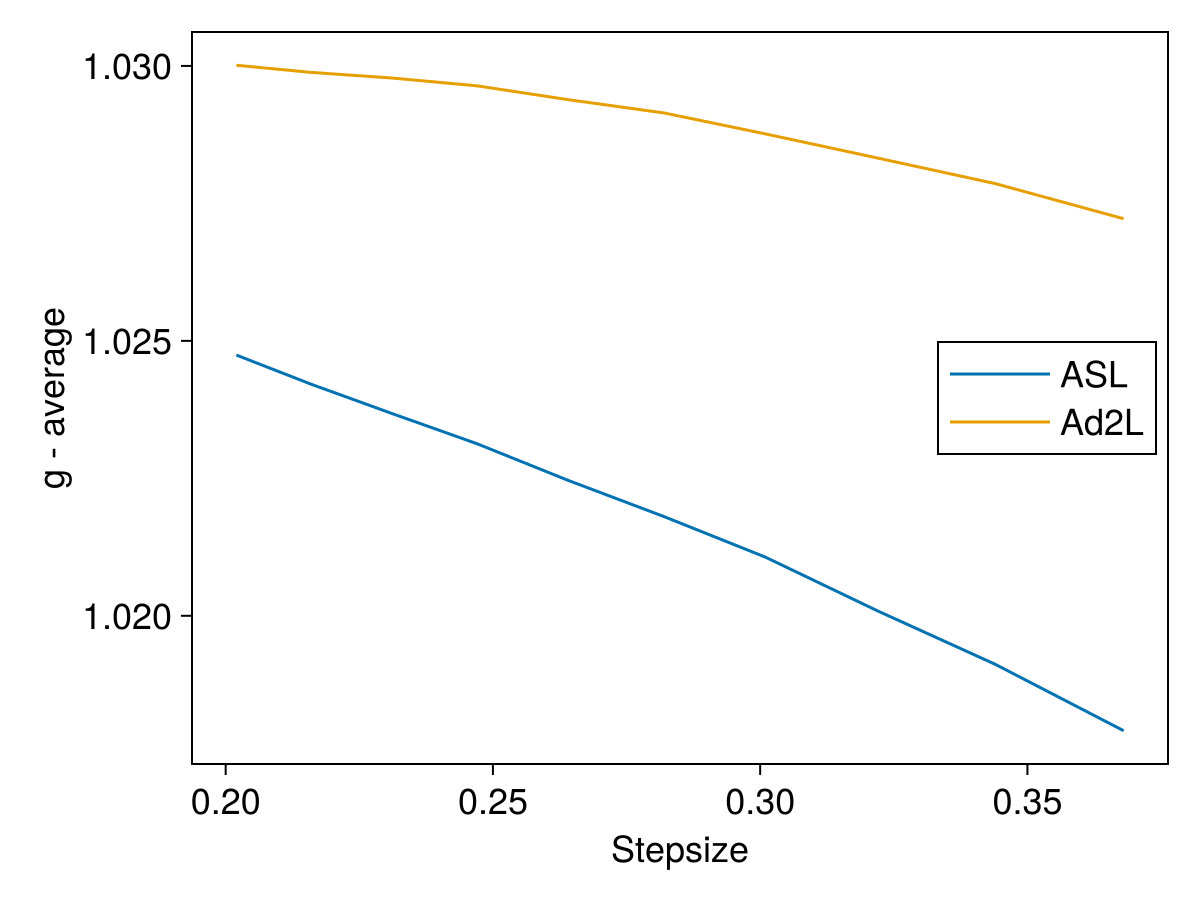

In [40]:
fig = Figure(size=(600, 450), fontsize=18)
ax = Axis(fig[1, 1], xlabel="Stepsize", ylabel="g - average")
ax.xgridvisible = false; ax.ygridvisible = false
lines!(ax, h_lst, g_avg_ASL_MAE, label="ASL")
lines!(ax, h_lst, g_avg_Ad2L_MAE, label="Ad2L")

axislegend(ax, position=:rc, patchsize = (50, 20))
# save("g_avg_steep_MAE_nonoise.pdf", fig)
# save("g_avg_steep_MAE_smallnoise.pdf", fig)
# save("g_avg_steep_MAE_largenoise.pdf", fig)
fig